# 実装例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

np.random.seed(1)

In [2]:
class ModelFrame:
    def __init__(self):
        self.param={}
    
    def fit(self, x, t):
        """
        input, labelを受け取って、パラメータを求める
        """
        pass
    
    def predict(self, data):
        """
        inputを受け取って、fitで求めたパラメータを使って推測したlabelを返す
        """
        pass
    
    def show_result(self):
        """
        結果をわかりやすく表示する
        必要があればレポートを自動生成したりする
        """
        pass

In [3]:
class MaximumLiklihoodModel(ModelFrame):
    def __init__(self):
        super(MaximumLiklihoodModel, self).__init__()
        self.LL_list =[]
    
    def __get_logliklihood_coin(self, data, p):
        """
        Args:
            data[np.array]: コインが表なら1, 裏なら0のデータ
            p[float]: コインの表が出る確率
        Return:
            logliklihood[float]: データの対数尤度
        """
        logliklihood = np.log(p) * np.sum(data==1) \
                        + np.log(1-p) * np.sum(data==0)
        return logliklihood

    def fit(self, data):
        self.LL_list = []
        epsilon = 10**(-3)
        self.param["i_hat"] = 0
        self.p_space = np.linspace(epsilon,1-epsilon,100)

        for i in range(self.p_space.shape[0]):
            LL = self.__get_logliklihood_coin(data, self.p_space[i])
            self.LL_list.append(LL)
            if self.LL_list[i] > self.LL_list[self.param["i_hat"]]:
                self.param["i_hat"] = i
        self.param["probablity_of_coin"] = self.p_space[self.param["i_hat"]]

    def show_result(self):
        ymin, ymax = min(self.LL_list[1], self.LL_list[-1]),self.LL_list[self.param["i_hat"]]+100
        plt.plot(self.p_space, self.LL_list)
        plt.vlines(x = p_true, ymin=ymin, ymax=ymax)
        plt.ylim(ymin, ymax)
        plt.show(); plt.close()

        plt.plot(self.p_space, self.LL_list)
        plt.vlines(x = p_true, ymin=ymin, ymax=ymax, color="black")
        plt.vlines(x = self.p_space[self.param["i_hat"]], ymin=ymin, ymax=ymax, color="r")
        plt.ylim(self.LL_list[self.param["i_hat"]]-2,self.LL_list[self.param["i_hat"]]+2)
        plt.show(); plt.close()

        print(f"Maximum LogLiklihood = {self.LL_list[self.param['i_hat']]:.3}")
        print(f"p_ML = {self.p_space[self.param['i_hat']]:.3}")

## 使ってみる

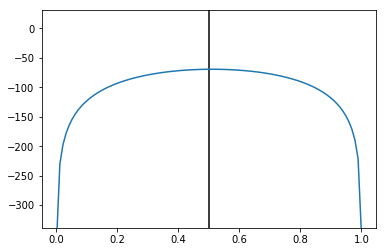

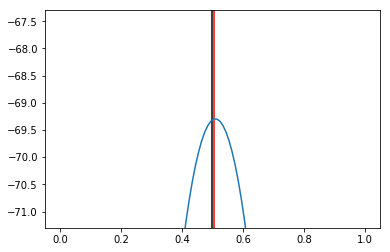

Maximum LogLiklihood = -69.3
p_ML = 0.505


In [4]:
# 表が出やすいコイン
p_true = 0.5 # 表が出る確率
N = 10**2 # 観測したデータ数

# 表なら1, 裏なら0を記録する
data = (np.random.random(N)<p_true).astype(int)

coinModel = MaximumLiklihoodModel()
coinModel.fit(data)
coinModel.show_result()